In [1]:
from virusPropagationModel import *
%matplotlib inline
import glob
import os
import matplotlib.pyplot as plt
import pandas


In [2]:
geopath = 'datafiles/'
geofiles = {0:'Buildings_Bad_Feilnbach_MA_0_5.csv',
            1:'Buildings_Bad_Feilnbach_MA_1.csv',
            2:'Buildings_Bad_Feilnbach_MA_3.csv'}

In [3]:
modeledWorld1 = ModeledPopulatedWorld(1000,5, world_from_file=True, geofile_name=geopath+geofiles[2], agent_agent_infection=True, input_schedules='schedules_v1')
print('Number of agents: '+ str(modeledWorld1.number_of_people))
print('Distribution of initialized locations: ' + str(modeledWorld1.get_distribution_of_location_types()))

Number of agents: 1513
Distribution of initialized locations: {'hospital': 1, 'morgue': 1, 'work': 24, 'public': 18, 'school': 3, 'home': 713}


In [4]:
modeledWorld1.save('Bad_Feilnbach',date_suffix=False)

Text(0, 0.5, 'Number of Locations')

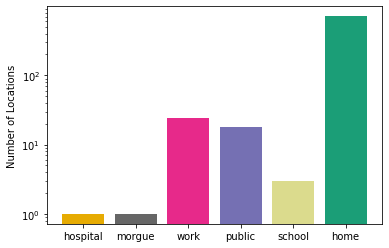

In [5]:
modeledWorld1.plot_distribution_of_location_types()
ax = plt.gca()
ax.set_yscale('log')
ax.set_ylabel('Number of Locations')

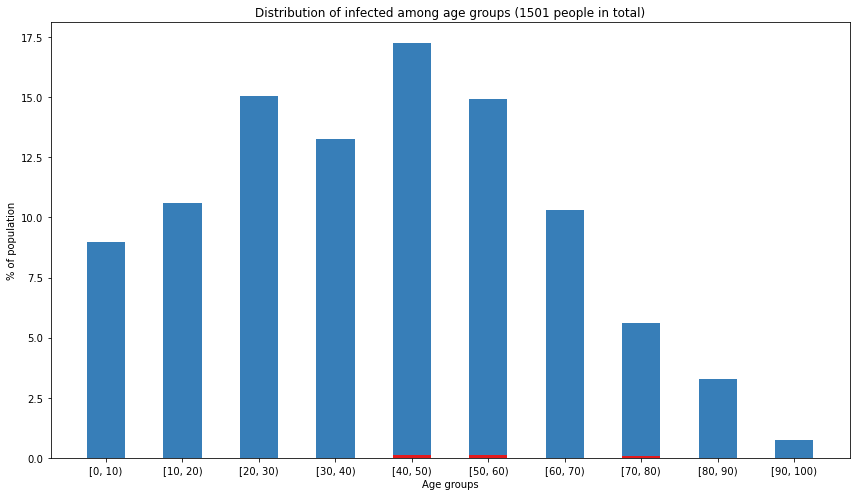

In [6]:
modeledWorld1.plot_initial_distribution_of_ages_and_infected(age_groups_step=10)

### equal interactionfre

In [4]:
simulation1 = Simulation(modeledWorld1,300,run_immediately=False)
simulation1.change_agent_attributes({'all':{'behaviour_as_infected':{'value':0.6,'type':'replacement'}}})
simulation1.interaction_frequency=1
simulation1.simulate()


In [5]:
kids = [p.ID for p in modeledWorld1.people if p.age<25]
simulation2 = Simulation(modeledWorld1,300,run_immediately=False)
simulation2.change_agent_attributes({'all':{'behaviour_as_infected':{'value':0.6,'type':'replacement'}}}) 
[setattr(p, 'interaction_modifier', 3 ) for p in simulation2.people if p.age<25]
simulation2.interaction_frequency=1
simulation2.simulate()

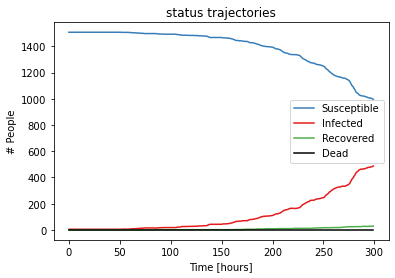

In [6]:
simulation1.plot_status_timecourse()

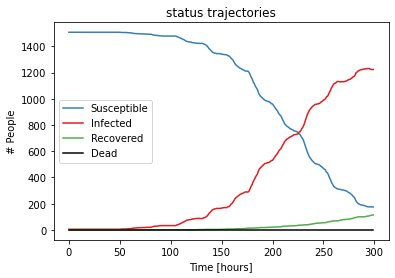

In [7]:
simulation2.plot_status_timecourse()

In [8]:
simulation2.get_infections_per_location_type(relative_to_building_number=False)

{'hospital': 24,
 'morgue': 0.0,
 'work': 234,
 'public': 556,
 'school': 194,
 'home': 328}

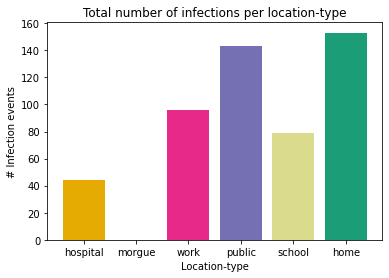

In [12]:
simulation1.plot_infections_per_location_type(relative_to_building_number=False)

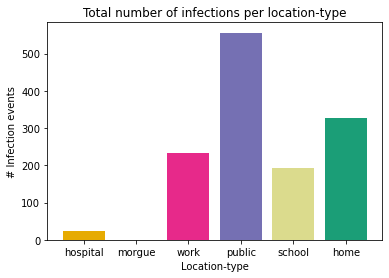

In [11]:
simulation2.plot_infections_per_location_type(relative_to_building_number=False)

In [154]:
mu_list=np.arange(1,79,20)
mu_dict={}
mu_list

array([ 1, 21, 41, 61])

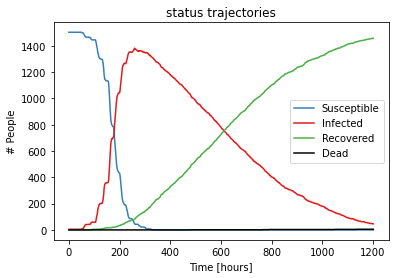

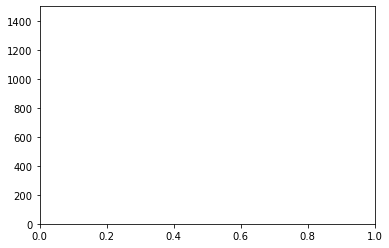

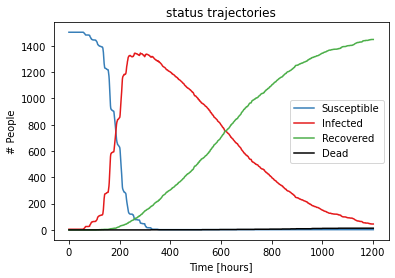

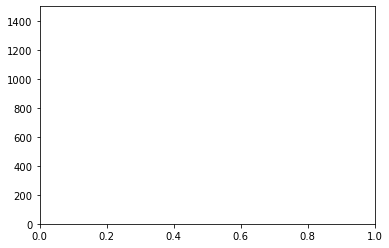

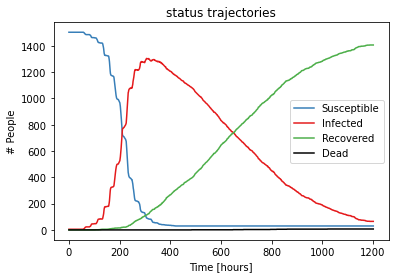

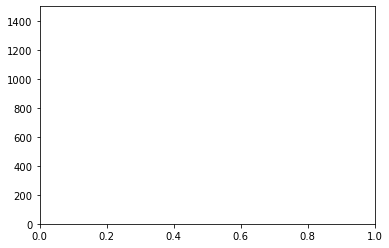

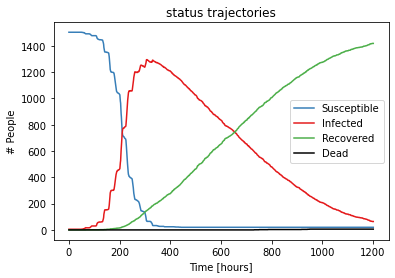

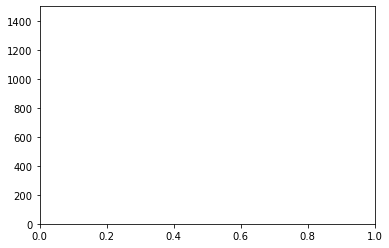

<Figure size 432x288 with 0 Axes>

In [155]:
Inf = 4.0
for mu in mu_list:
    simulation1 = Simulation(modeledWorld1,1200,run_immediately=False)
    simulation1.change_agent_attributes({'all':{'behaviour_as_infected':{'value':Inf/mu,'type':'replacement'}}})
    simulation1.interaction_frequency=mu
    simulation1.simulate()

    for p in list(simulation1.people):
        p.stay_home_instead_of_going_to('work')
        p.stay_home_instead_of_going_to('school')
        p.stay_home_instead_of_going_to('public')

    simulation1.time_steps=1
    simulation1.simulate()

    for p in list(simulation1.people):
        p.reset_schedule()

    simulation1.time_steps=1
    simulation1.simulate()
    simulation1.plot_status_timecourse()
    plt.ylim(0,1500)
    plt.figure(mu+1)
    df = simulation1.simulation_timecourse
    mu_dict[mu] = df.copy()
    ### interactions
    #ips=list(df['Interaction_partner'].values)
    #connections =[len(step.split(',')) for step in ips if step !='']
    #plt.figure(mu)
    #plt.hist(connections,bins=20)
    #plt.title('mu: '+str(mu))

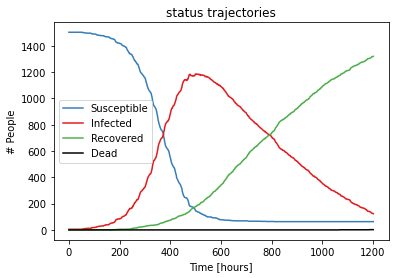

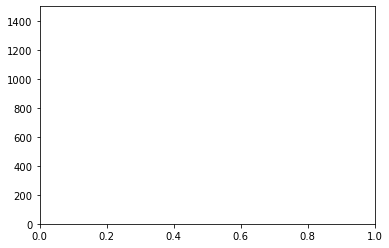

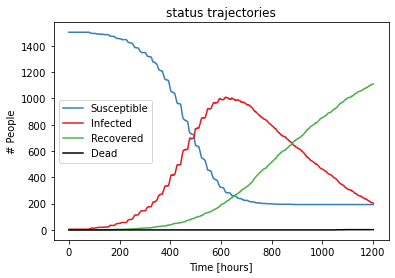

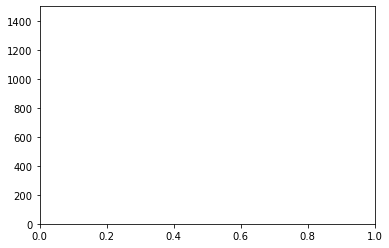

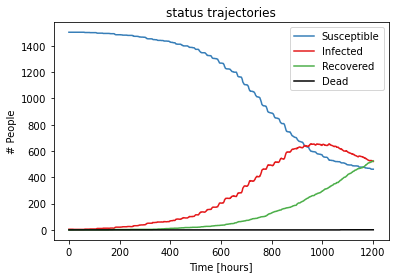

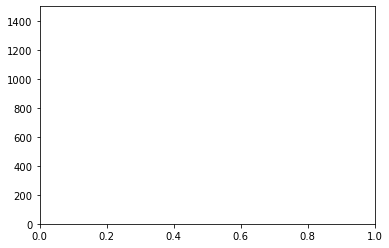

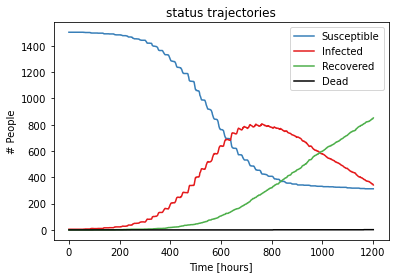

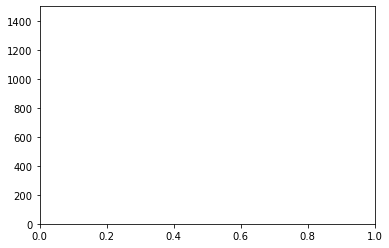

<Figure size 432x288 with 0 Axes>

In [156]:
Inf = 0.5
mu_dict_05={}
for mu in mu_list:
    simulation1 = Simulation(modeledWorld1,1200,run_immediately=False)
    simulation1.change_agent_attributes({'all':{'behaviour_as_infected':{'value':Inf/mu,'type':'replacement'}}})
    simulation1.interaction_frequency=mu
    simulation1.simulate()

    for p in list(simulation1.people):
        p.stay_home_instead_of_going_to('work')
        p.stay_home_instead_of_going_to('school')
        p.stay_home_instead_of_going_to('public')

    simulation1.time_steps=1
    simulation1.simulate()

    for p in list(simulation1.people):
        p.reset_schedule()

    simulation1.time_steps=1
    simulation1.simulate()
    simulation1.plot_status_timecourse()
    plt.ylim(0,1500)
    plt.figure(mu+1)
    df = simulation1.simulation_timecourse
    mu_dict_05[mu] = df.copy()
    ### interactions
    #ips=list(df['Interaction_partner'].values)
    #connections =[len(step.split(',')) for step in ips if step !='']
    #plt.figure(mu)
    #plt.hist(connections,bins=20)
    #plt.title('mu: '+str(mu))

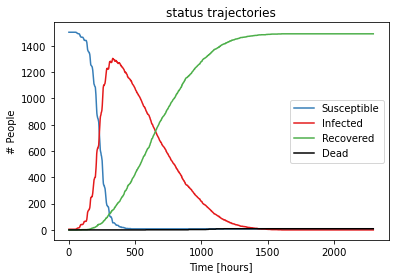

(array([7.42623e+05, 5.32476e+05, 5.04793e+05, 2.99938e+05, 1.99513e+05,
        1.31921e+05, 8.78040e+04, 4.97660e+04, 2.43740e+04, 0.00000e+00,
        1.08620e+04, 4.46300e+03, 1.54300e+03, 5.12000e+02, 1.69000e+02,
        4.90000e+01, 9.00000e+00, 2.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ,
        10.9, 11.8, 12.7, 13.6, 14.5, 15.4, 16.3, 17.2, 18.1, 19. ]),
 <a list of 20 Patch objects>)

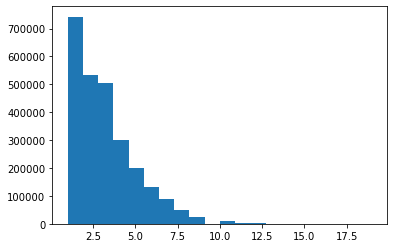

In [38]:
simulation1 = Simulation(modeledWorld1,800,run_immediately=False)
simulation1.change_agent_attributes({'all':{'behaviour_as_infected':{'value':0.3,'type':'replacement'}}})
simulation1.interaction_frequency=5
simulation1.simulate()

for p in list(simulation1.people):
    p.stay_home_instead_of_going_to('work')
    p.stay_home_instead_of_going_to('school')
    p.stay_home_instead_of_going_to('public')

simulation1.time_steps=500
simulation1.simulate()

for p in list(simulation1.people):
    p.reset_schedule()

simulation1.time_steps=1000
simulation1.simulate()
simulation1.plot_status_timecourse()
df= simulation1.simulation_timecourse
### interactions
ips=list(df['Interaction_partner'].values)
connections =[len(step.split(',')) for step in ips if step !='']
plt.hist(connections,bins=20)

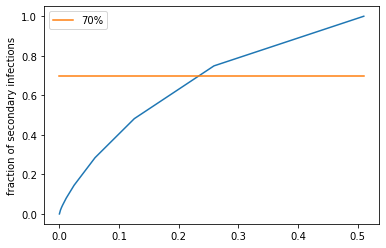

In [130]:
###plot ratio
secondary_infs.sort(reverse=True)
sum_inf = [sum(secondary_infs[0:x]) for x in range(len(secondary_infs))]
plt.plot(np.array(list(range(len(secondary_infs))))/max(sum_inf),np.array(sum_inf)/max(sum_inf))
plt.plot(np.array(list(range(len(secondary_infs))))/max(sum_inf),[0.7]*len(sum_inf), label='70%')
plt.ylabel('fraction of secondary infections')
plt.xlabel('')
plt.legend()


In [152]:
for dict_,k in enumerate([mu_dict, mu_dict_05]):
    for mu in dict_:
        df_1=mu_dict[mu]
        df=df_1#df_1[df_1['time']<700]
        infections = df[df['Infection_event']>0]
        spreader = list(infections['Infection_event'].values)
        spreader_ids=list(set(spreader))
        secondary_infs=[spreader.count(x) for x in spreader_ids]
        print(np.array(secondary_infs).mean())
        print(np.array(secondary_infs).max())
        #plt.figure(mu)
        #plt.hist(secondary_infs, color='r')

        ips=list(df['Interaction_partner'].values)
        connections =[len(step.split(',')) for step in ips if step !='']
        #plt.figure(mu+1)
        #plt.hist(connections,bins=20)
        #plt.title('mu: '+str(mu))

        ###plot ratio
        plt.figure(k)
        secondary_infs.sort(reverse=True)
        sum_inf = [sum(secondary_infs[0:x]) for x in range(len(secondary_infs))]
        plt.plot(np.array(list(range(len(secondary_infs))))/max(sum_inf),np.array(sum_inf)/max(sum_inf), label=mu)

        plt.ylabel('fraction of secondary infections')
        plt.xlabel('')
        plt.legend()
    plt.figure(3)    
    plt.plot(np.array(list(range(len(secondary_infs))))/max(sum_inf),[0.7]*len(sum_inf), label='70%')    
    plt.plot(np.array(list(range(len(secondary_infs))))/max(sum_inf),[0.5]*len(sum_inf), label='50%') 

mu_dict_05

TypeError: 'int' object is not iterable

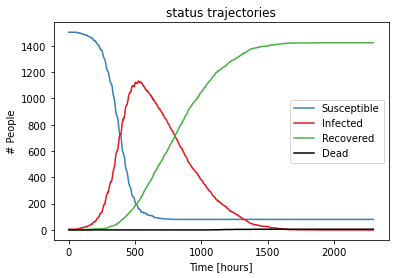

(array([5.199090e+05, 0.000000e+00, 1.456916e+06, 0.000000e+00,
        3.632930e+05, 0.000000e+00, 6.600800e+04, 0.000000e+00,
        1.213200e+04, 0.000000e+00, 2.487000e+03, 0.000000e+00,
        4.580000e+02, 0.000000e+00, 7.100000e+01, 0.000000e+00,
        1.100000e+01, 0.000000e+00, 0.000000e+00, 2.000000e+00]),
 array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,
         6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. ]),
 <a list of 20 Patch objects>)

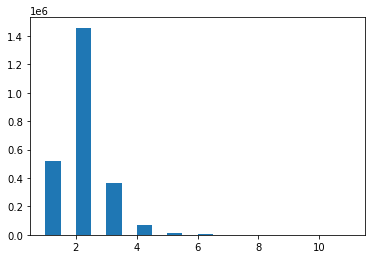

In [36]:
simulation1 = Simulation(modeledWorld1,800,run_immediately=False)
simulation1.change_agent_attributes({'all':{'behaviour_as_infected':{'value':0.3,'type':'replacement'}}})
simulation1.interaction_matrix=False
simulation1.simulate()

for p in list(simulation1.people):
    p.stay_home_instead_of_going_to('work')
    p.stay_home_instead_of_going_to('school')
    p.stay_home_instead_of_going_to('public')

simulation1.time_steps=500
simulation1.simulate()

for p in list(simulation1.people):
    p.reset_schedule()

simulation1.time_steps=1000
simulation1.simulate()
simulation1.plot_status_timecourse()

### interactions
df= simulation1.simulation_timecourse
ips=list(df['Interaction_partner'].values)
connections =[len(step.split(',')) for step in ips if step !='']
plt.hist(connections, bins=20)

(array([5.199090e+05, 0.000000e+00, 1.456916e+06, 0.000000e+00,
        3.632930e+05, 0.000000e+00, 6.600800e+04, 0.000000e+00,
        1.213200e+04, 0.000000e+00, 2.487000e+03, 0.000000e+00,
        4.580000e+02, 0.000000e+00, 7.100000e+01, 0.000000e+00,
        1.100000e+01, 0.000000e+00, 0.000000e+00, 2.000000e+00]),
 array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,
         6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. ]),
 <a list of 20 Patch objects>)

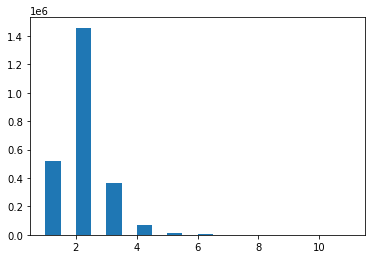

In [37]:
df= simulation1.simulation_timecourse
ips=list(df['Interaction_partner'].values)
connections =[len(step.split(',')) for step in ips if step !='']
plt.hist(connections,bins=20)

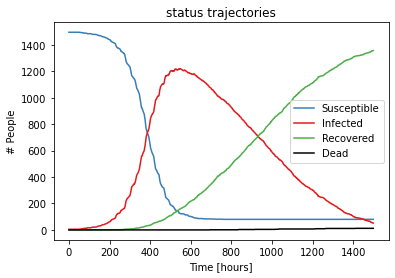

In [14]:
simulation1 = Simulation(modeledWorld1,200,run_immediately=False)
simulation1.simulate()
simulation1.plot_status_timecourse()

In [9]:
simulation2 = Simulation(modeledWorld1,1500,run_immediately=False)
simulation2.change_agent_attributes({'all':{'behaviour_as_infected':{'value':0.3,'type':'replacement'}}})
simulation2.interaction_matrix=False

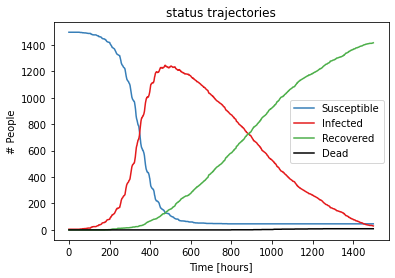

In [10]:
simulation2.simulate()
simulation2.plot_status_timecourse()

In [44]:
simulation1.save('Bad_Feilnbach_SIM', date_suffix=False )

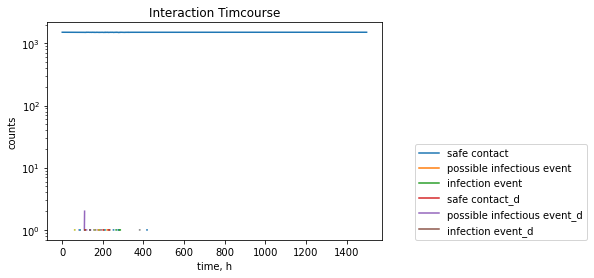

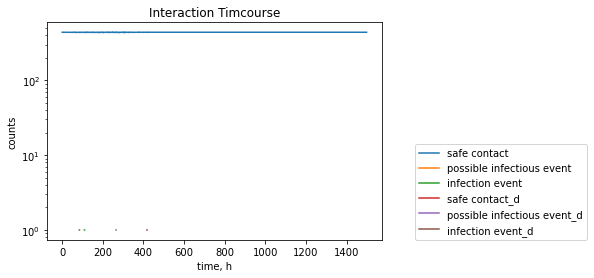

In [25]:
simulation1.plot_interaction_timecourse(save_figure=False, log=True, diagnosed_contact=False)
simulation1.plot_interaction_timecourse(save_figure=False, log=True, diagnosed_contact=True)

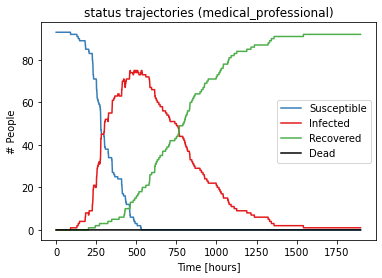

In [10]:
simulation1.plot_status_timecourse(specific_people='medical_professional')

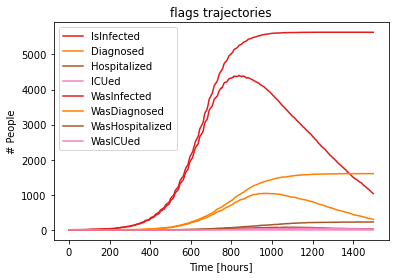

In [32]:
simulation1.plot_flags_timecourse()

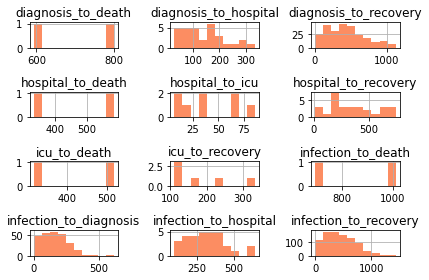

In [13]:
simulation1.plot_distributions_of_durations()

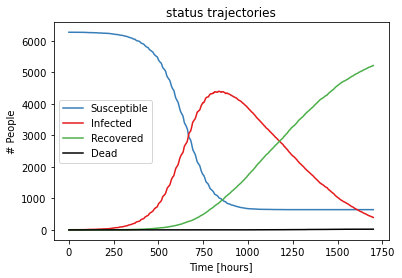

In [35]:
simulation2 = Simulation(simulation1,200) # Now Simulation class objects can be used for subsequent simulation (nested)
simulation2.plot_status_timecourse()

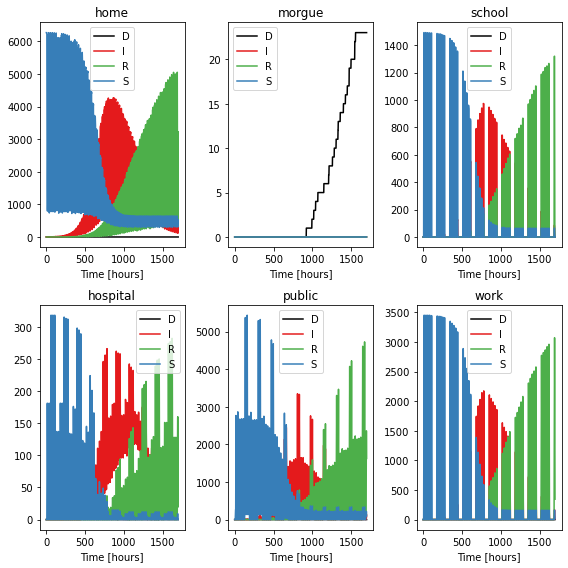

In [36]:
simulation2.plot_status_at_location()

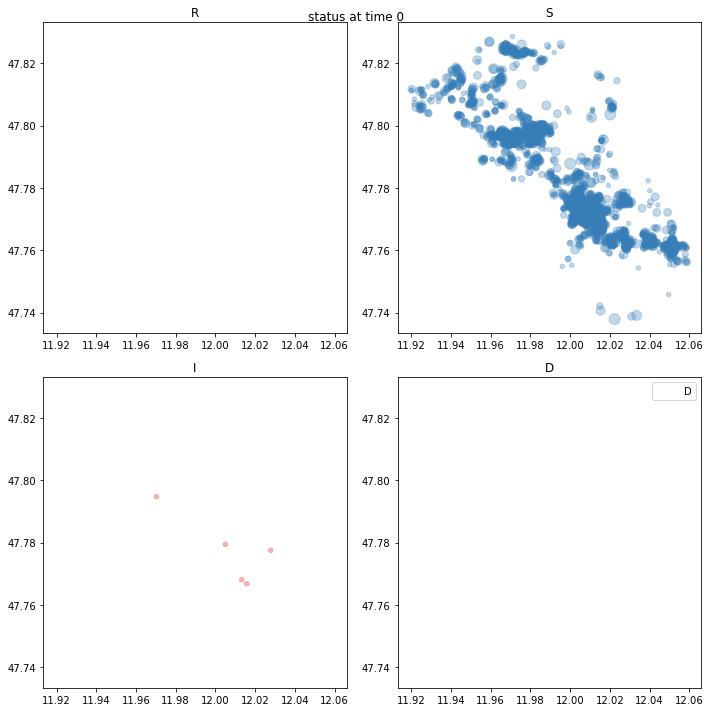

In [37]:
simulation1.map_status_at_loc(save_figure=False,time_steps=1)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


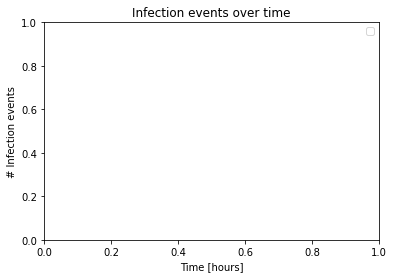

In [17]:
simulation1.plot_infections_per_location_type_over_time()

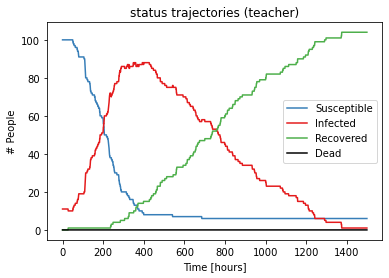

In [18]:
simulation1.plot_status_timecourse(specific_people='teacher')

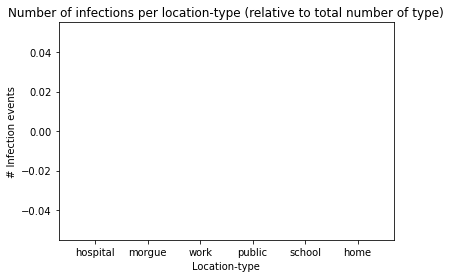

In [19]:
simulation1.plot_infections_per_location_type()

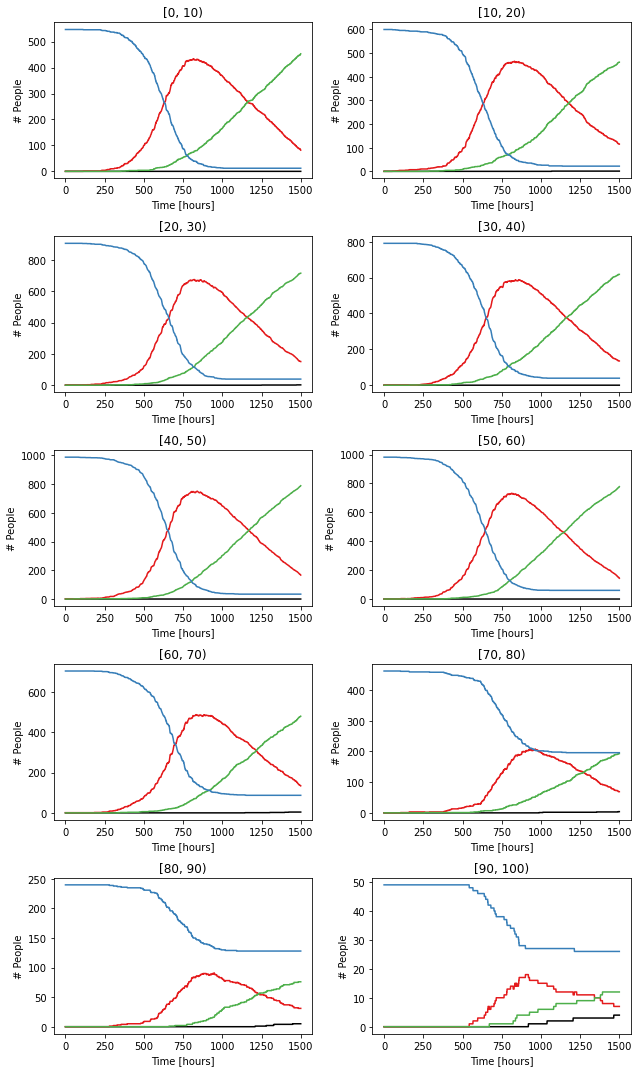

In [38]:
simulation1.plot_age_groups_status_timecourse()